**Abstract**

Since 2008, guests and hosts have been using Airbnb to broaden their travel options and offer a more distinct, personalized way of exploring the world. Today, Airbnb has become a one-of-a-kind service that is utilized and recognized worldwide. Data analysis of the millions of listings available on Airbnb plays a vital role for the company. These extensive listings generate a wealth of data, which can be analyzed and utilized for purposes such as security, making business decisions, understanding customer and host behavior and performance on the platform, guiding marketing strategies, implementing innovative additional services, and much more.

Vancouver, a city on the west coast of Canada, is often regarded as one of the best places to live in the world. Nestled between the mountains and the ocean, it boasts breathtaking natural landscapes and a mild climate. The city offers a vibrant multicultural atmosphere, with diverse communities and a rich arts and culture scene. Vancouver's commitment to sustainability, with initiatives such as bike lanes and green spaces, contributes to its livability. It consistently ranks highly in global surveys, affirming its status as an ideal city to call home.

**Data Source**

This dataset has around 6,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

**Acquaring and Loading Data**

In [1]:
#Graphic design package
!pip install pywaffle -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 39.2 MB/s eta 0:00:00


In [2]:
#importing necessery libraries for future analysis of the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from pywaffle import Waffle
from wordcloud import WordCloud
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the file
df = pd.read_csv('http://data.insideairbnb.com/canada/bc/vancouver/2023-03-14/visualisations/listings.csv')

**Variables dictionary**

* `id` - Generated ID number to identify the property
* `name` - Name of the listed property
* `host_id` - ID number of the property owner (host)
* `host_name` -  Host's name
* `neighbourhood_group` - This column does not contain any valid value
* `neighbourhood` - Name of the neighborhood
* `latitude` - Latitude coordinate of the property
* `longitude` - Longitude coordinate of the property
* `room_type` - Indicates the type of room being offered
* `price` - Price to rent the property
* `minimum_nights` - Minimum number of nights required for a reservation
* `number_of_reviews` - Number of reviews the property has
* `last_review` - Date of the last review
* `reviews_per_month` - Number of reviews per month
* `calculated_host_listings_count` - Number of properties owned by the same host
* `availability_365` - Number of available days within 365 days

Before starting any analysis, let's take a look at our dataset by examining the first 5 entries.

In [4]:
#drop columns
df = df.drop(['license', 'number_of_reviews_ltm'], axis=1)

#first 5 columns
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13358,Designer Styled One Bedroom Downtown Vancouver,52116,Lynn,NaN,West End,49.28201,-123.12669,Entire home/apt,157,2,443,2023-02-24,2.86,1,212
1,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,150,30,96,2022-11-06,0.67,1,152
2,14267,EcoLoft Vancouver,56030,Peter & Alison,NaN,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,150,3,34,2021-07-14,0.22,1,0
3,14424,Spacious one-bedroom in sought-after Strathcona,56709,Samantha Jo,NaN,Downtown Eastside,49.27921,-123.08835,Entire home/apt,110,30,265,2023-01-26,1.66,4,70
4,16254,Close to PNE/Hastings Park Garden level suite,63238,Jason,NaN,Hastings-Sunrise,49.27721,-123.04086,Entire home/apt,350,3,7,2022-07-30,0.12,1,194


In [5]:
##checking amount of rows and variables in given dataset to understand the size we are working with
print("Rows:\t {}".format(df.shape[0]))
print("Variables:\t {}\n".format(df.shape[1]))

#checking type of every column in the dataset
display(df.dtypes)

Rows:	 5975
Variables:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Understadning, Wrangling and Cleaning Data**

In [6]:
#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               5975
last_review                       1035
reviews_per_month                 1035
id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [7]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
df.drop(['id','host_name','last_review','neighbourhood_group'], axis=1, inplace=True)

#replacing all NaN values in 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
df.reviews_per_month.isnull().sum()

#examing the changes
df.head()

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Designer Styled One Bedroom Downtown Vancouver,52116,West End,49.28201,-123.12669,Entire home/apt,157,2,443,2.86,1,212
1,Vancouver's best kept secret,52467,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,150,30,96,0.67,1,152
2,EcoLoft Vancouver,56030,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,150,3,34,0.22,1,0
3,Spacious one-bedroom in sought-after Strathcona,56709,Downtown Eastside,49.27921,-123.08835,Entire home/apt,110,30,265,1.66,4,70
4,Close to PNE/Hastings Park Garden level suite,63238,Hastings-Sunrise,49.27721,-123.04086,Entire home/apt,350,3,7,0.12,1,194


**Exploring and Visualizing Data**

In [8]:
#let's proceed with examing some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
df.neighbourhood.unique()

array(['West End', 'Kensington-Cedar Cottage', 'Downtown Eastside',
       'Hastings-Sunrise', 'Grandview-Woodland', 'Renfrew-Collingwood',
       'Mount Pleasant', 'Kitsilano', 'Downtown', 'Riley Park',
       'Arbutus Ridge', 'Dunbar Southlands', 'Killarney', 'South Cambie',
       'Fairview', 'West Point Grey', 'Strathcona', 'Sunset',
       'Kerrisdale', 'Victoria-Fraserview', 'Marpole', 'Shaughnessy',
       'Oakridge'], dtype=object)

In [9]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
len(df.neighbourhood.unique())

23

In [10]:
#examining the unique values of room_type as this column will appear very handy for later analysis
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [11]:
#let's see what neighbourhood have the most listings on Airbnb platform and taking advantage of this service
top_neighbourhood_listing=df.neighbourhood.value_counts().head(10)
top_neighbourhood_listing

Downtown                    1624
West End                     527
Kitsilano                    458
Mount Pleasant               393
Kensington-Cedar Cottage     354
Downtown Eastside            314
Riley Park                   290
Grandview-Woodland           243
Renfrew-Collingwood          234
Hastings-Sunrise             233
Name: neighbourhood, dtype: int64

In [12]:
df[df['neighbourhood']=='Downtown'].neighbourhood.count()

1624

In [13]:
top_neighbourhood=pd.DataFrame(top_neighbourhood_listing)
top_neighbourhood.reset_index(inplace=True)
top_neighbourhood.rename(columns={'index':'neighbourhood', 'neighbourhood':'P_Count'}, inplace=True)
top_neighbourhood

,neighbourhood,P_Count
0,Downtown,1624
1,West End,527
2,Kitsilano,458
3,Mount Pleasant,393
4,Kensington-Cedar Cottage,354
5,Downtown Eastside,314
6,Riley Park,290
7,Grandview-Woodland,243
8,Renfrew-Collingwood,234
9,Hastings-Sunrise,233


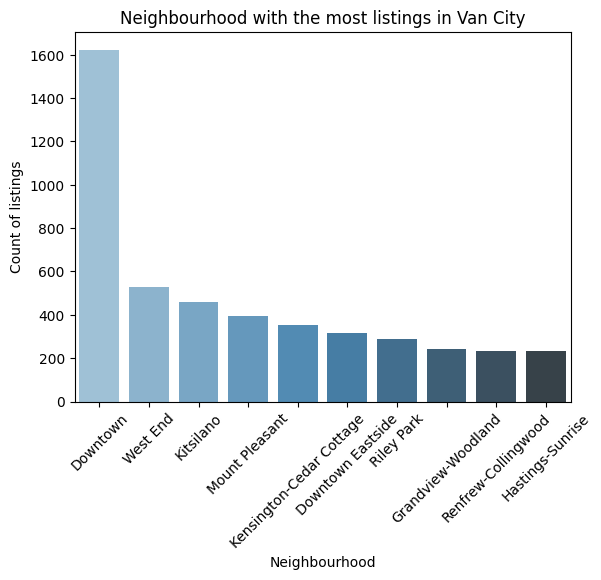

In [14]:
viz_1=sns.barplot(x="neighbourhood", y="P_Count", data=top_neighbourhood,
                 palette='Blues_d')
viz_1.set_title('Neighbourhood with the most listings in Van City')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Neighbourhood')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

plt.show()

In [15]:
filter = top_neighbourhood['neighbourhood']
value_filter = df.neighbourhood.isin(filter)
df_top_list_neighbourhood = df[value_filter]
len(df_top_list_neighbourhood.neighbourhood.unique())

10

In [16]:
df_top_list_neighbourhood_room = df_top_list_neighbourhood[['neighbourhood','room_type']]

df_top_list_neighbourhood_room = pd.crosstab(df_top_list_neighbourhood.neighbourhood,df_top_list_neighbourhood.room_type)
df_top_list_neighbourhood_room

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Downtown,1501,115,8
Downtown Eastside,294,19,1
Grandview-Woodland,214,29,0
Hastings-Sunrise,176,57,0
Kensington-Cedar Cottage,264,90,0
Kitsilano,401,55,2
Mount Pleasant,326,66,1
Renfrew-Collingwood,157,77,0
Riley Park,229,57,4


In [17]:
df_top_list_neighbourhood[['price','minimum_nights']].describe()

,price,minimum_nights
count,4670.000000,4670.000000
mean,214.853533,18.427837
std,1156.695677,33.681172
min,14.000000,1.000000
25%,109.000000,2.000000
50%,150.000000,4.000000
75%,222.000000,30.000000
max,77178.000000,399.000000


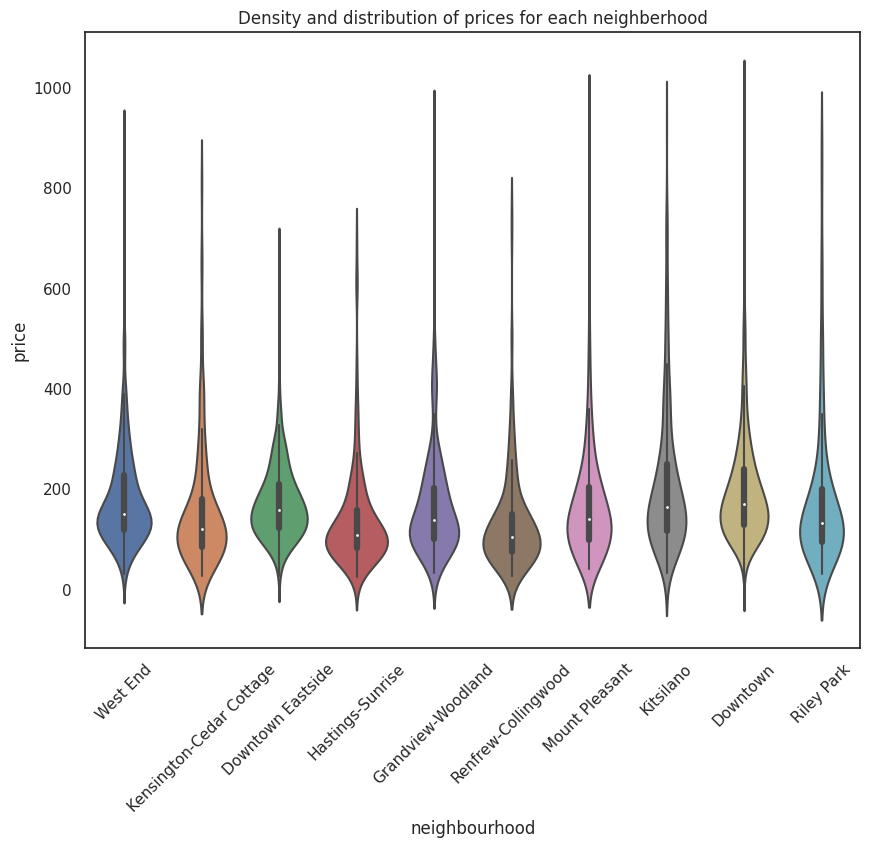

In [18]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

#creating a sub-dataframe with no extreme values / less than 
sub_1=df_top_list_neighbourhood[df_top_list_neighbourhood.price < 1000]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_1, x='neighbourhood', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood')
viz_2.set_xticklabels(viz_2.get_xticklabels(), rotation=45)
plt.show();

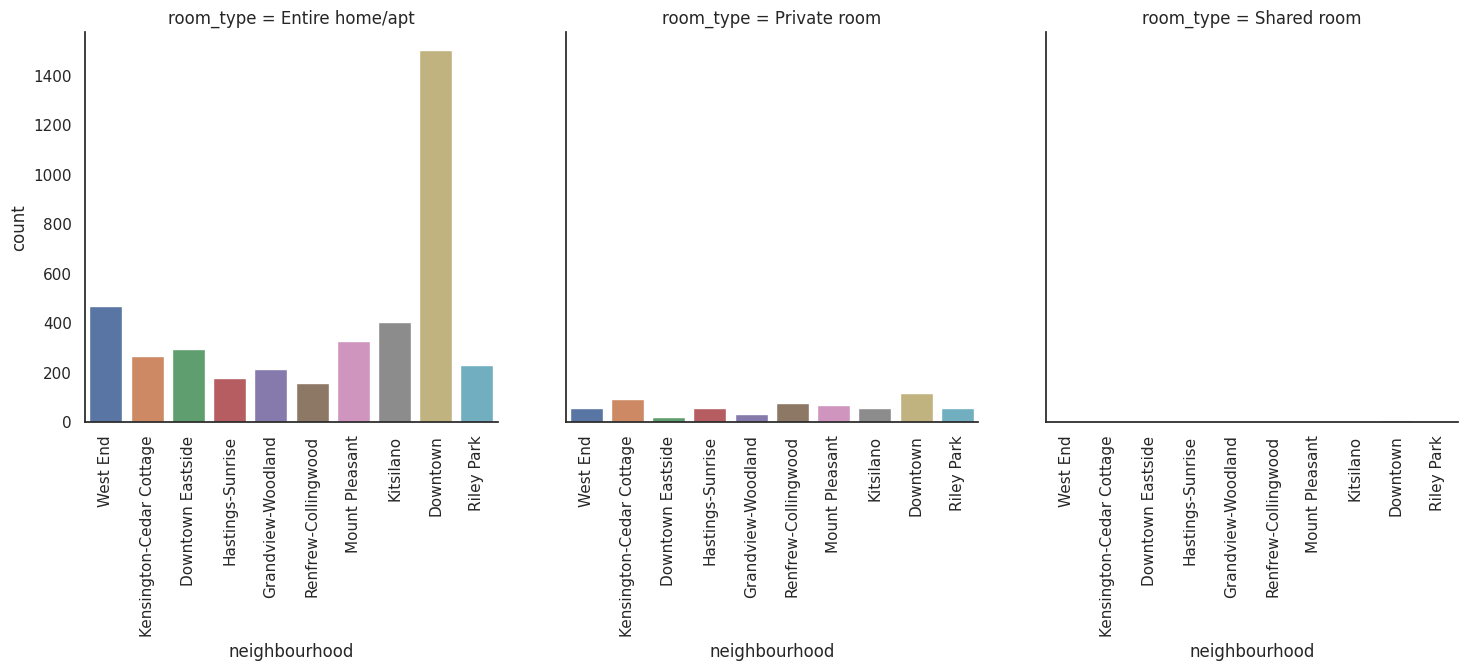

In [19]:
sub_2=df.loc[df['neighbourhood'].isin(filter)]#(['Downtown','Hastings-Sunrise','Riley Park'])]

#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', col='room_type', data=sub_2, kind='count')
viz_3.set_xticklabels(rotation=90)
plt.show();

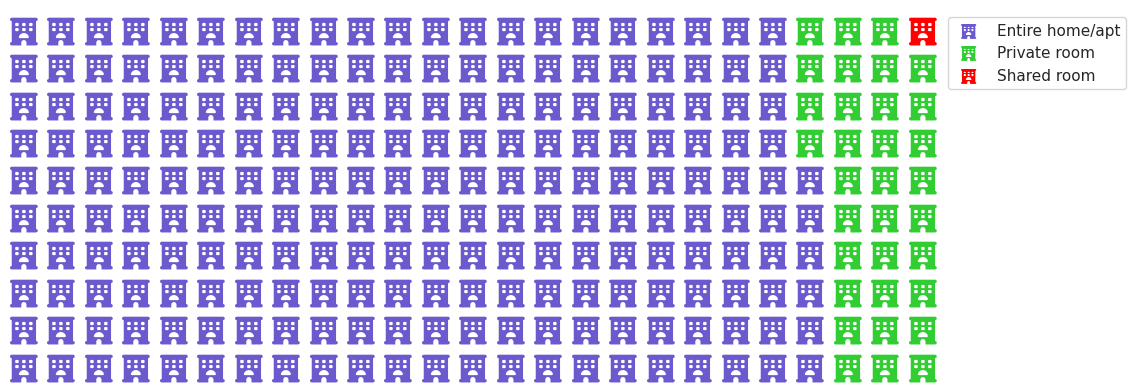

Entire home/apt    4031
Private room        620
Shared room          19
Name: room_type, dtype: int64


In [20]:
roomTp = dict(sub_2.room_type.value_counts())

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=25,
    figsize=(12,10),
    colors=('slateblue', 'limegreen', 'red'),# 'grey'),
    values = roomTp,
    icons="hotel",
    icon_size=20,
    legend={"loc": "upper left", "bbox_to_anchor": (1,1)},
    icon_legend=True
)

fig.set_tight_layout(False)
plt.show();
print(sub_2.room_type.value_counts())

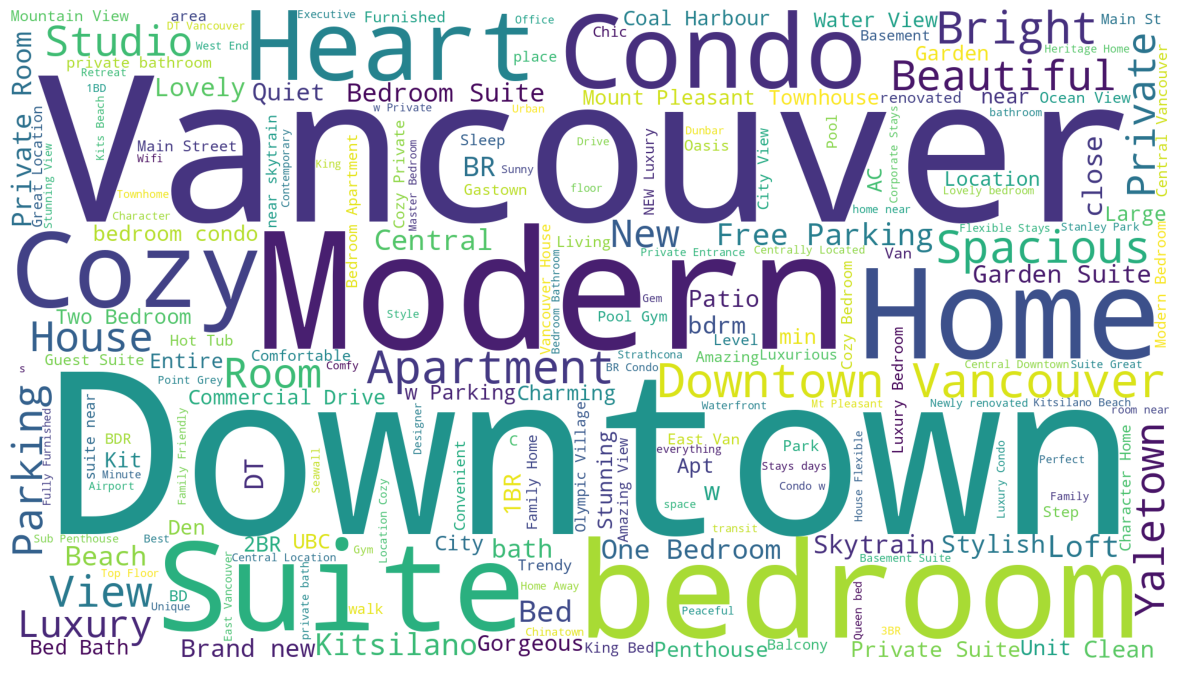

In [21]:
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

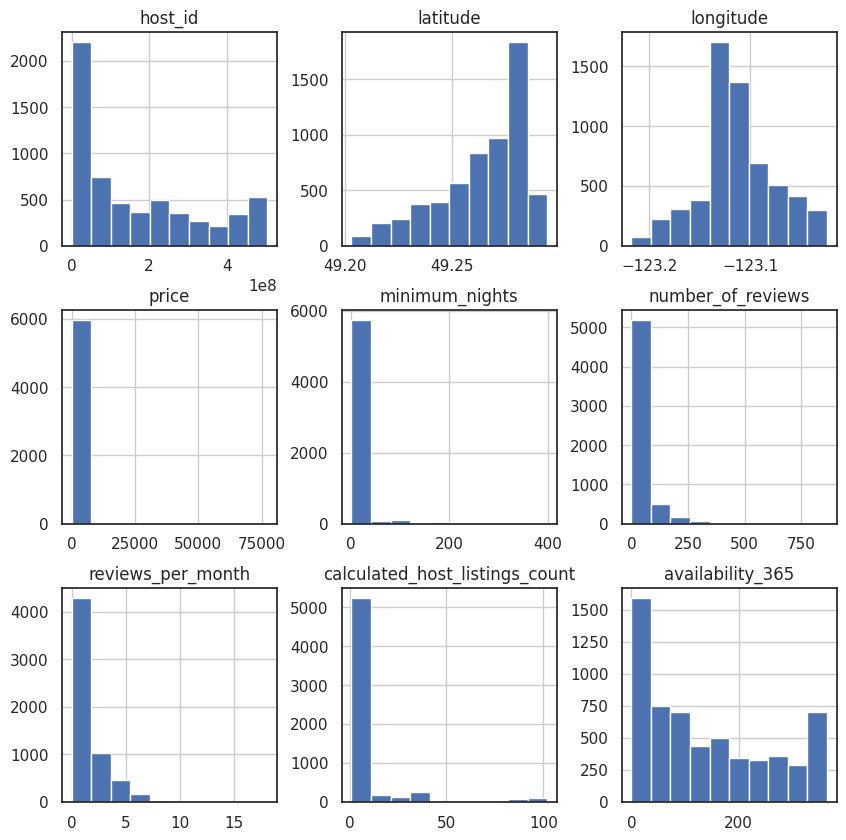

In [22]:
#variables histogram
df.hist(bins=10, figsize=(10,10));

In [24]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#statistical summary
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,217.421757,17.361339,37.731381,1.342007,7.311632,139.216904
std,1087.709532,32.705775,67.994988,1.686375,17.694416,120.738639
min,14.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,101.000000,2.000000,2.000000,0.110000,1.000000,31.000000
50%,149.000000,3.000000,10.000000,0.610000,1.000000,105.000000
75%,219.000000,30.000000,44.000000,2.060000,3.000000,236.500000
max,77178.000000,399.000000,863.000000,18.090000,102.000000,365.000000


minimum_nights: extreme values more than 50:
218 rows
3.6485%


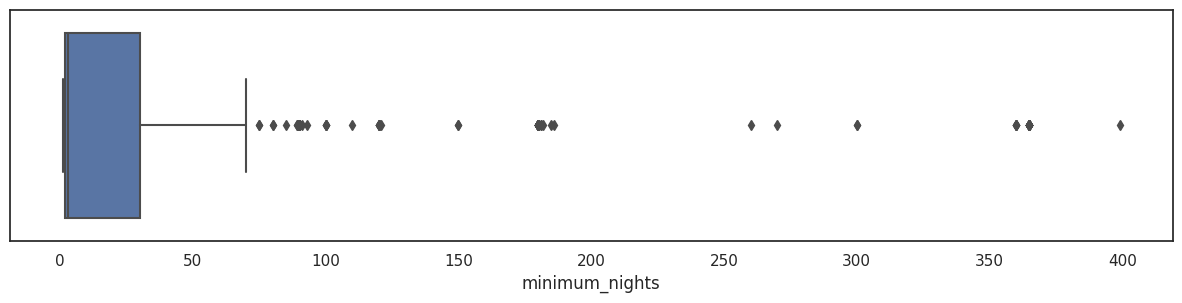

In [30]:
# minimum_nights
plt.figure(figsize=(15,3))
sns.boxplot(data=df, x="minimum_nights")

print("minimum_nights: extreme values more than 50:")
print("{} rows".format(len(df[df.minimum_nights > 50])))
print("{:.4f}%".format((len(df[df.minimum_nights > 50]) / df.shape[0])*100))


price: extreme values more than 1000
54 rows
0.9038%


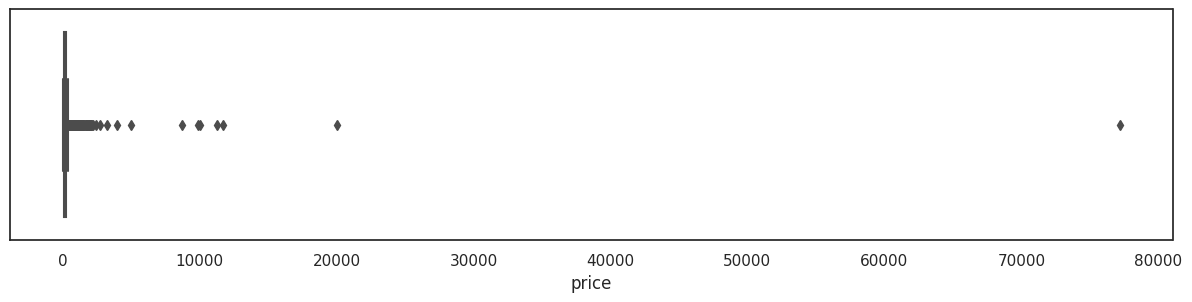

In [31]:
# price
plt.figure(figsize=(15,3))
sns.boxplot(data=df, x="price")

print("\nprice: extreme values more than 1000")
print("{} rows".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

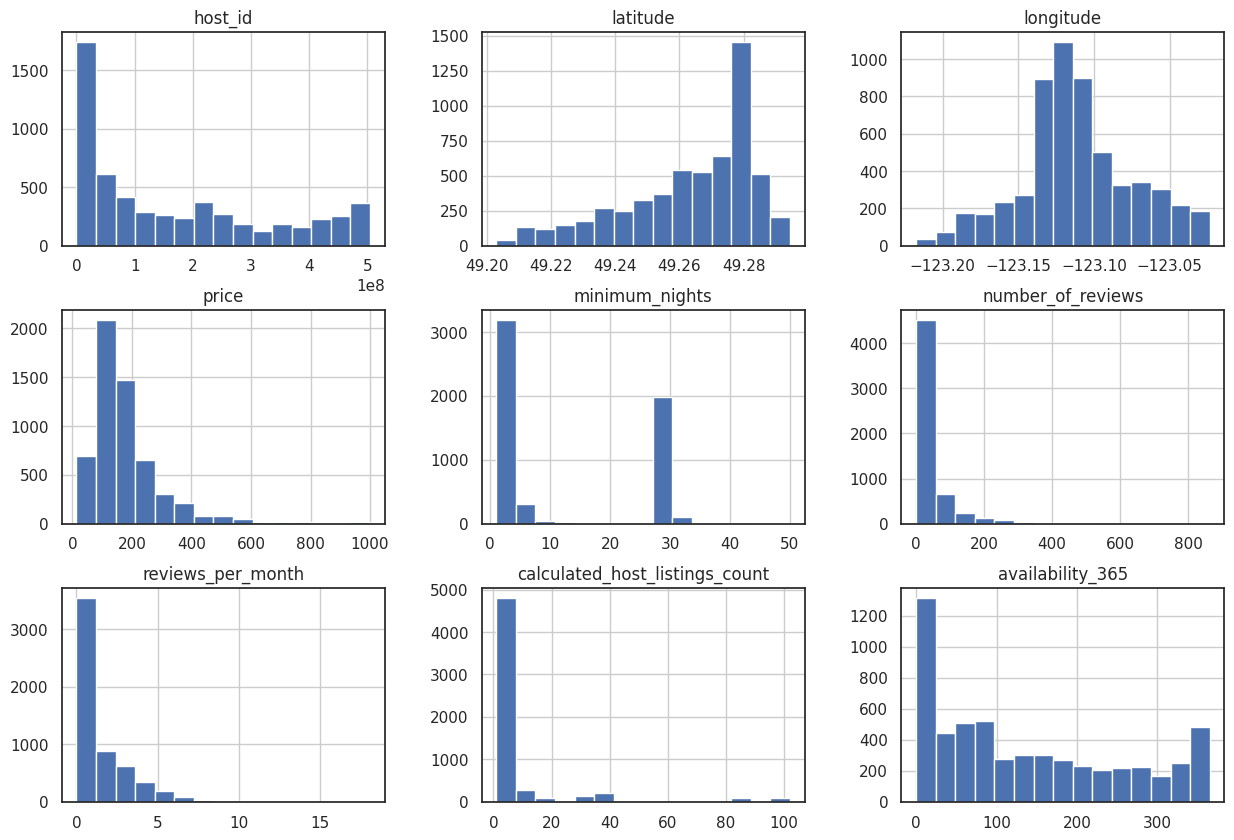

In [32]:
#dataframe remove outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 50].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

In [33]:
# mean 'price'
print("Mean price with outliers: U${:.4}".format(df.price.mean()))
print("Mean price without outliers: U${:.4}".format(df_clean.price.mean()))

Mean price with outliers: U$217.4
Mean price without outliers: U$181.5


In [34]:
# mean `minimum_nights``
print("Mean minimum_nights with outliers: {:.3}".format(df.minimum_nights.mean()))
print("Mean minimum_nights without outliers: {:.3}".format(df_clean.minimum_nights.mean()))

Mean minimum_nights with outliers: 17.4
Mean minimum_nights without outliers: 12.8


In [36]:
#corr matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','latitude','longitude',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,latitude,longitude,calculated_host_listings_count,availability_365
price,1.000000,-0.136866,-0.086518,-0.041764,0.129008,-0.142411,-0.034856,0.096524
minimum_nights,-0.136866,1.000000,-0.252964,-0.460957,0.132166,-0.135119,0.235240,0.196660
number_of_reviews,-0.086518,-0.252964,1.000000,0.546046,0.036840,0.068609,-0.148417,-0.083290
reviews_per_month,-0.041764,-0.460957,0.546046,1.000000,0.044854,0.077360,-0.128005,-0.034182
latitude,0.129008,0.132166,0.036840,0.044854,1.000000,-0.127291,0.092466,-0.020164
longitude,-0.142411,-0.135119,0.068609,0.077360,-0.127291,1.000000,-0.114870,-0.044533
calculated_host_listings_count,-0.034856,0.235240,-0.148417,-0.128005,0.092466,-0.114870,1.000000,0.147046
availability_365,0.096524,0.196660,-0.083290,-0.034182,-0.020164,-0.044533,0.147046,1.000000


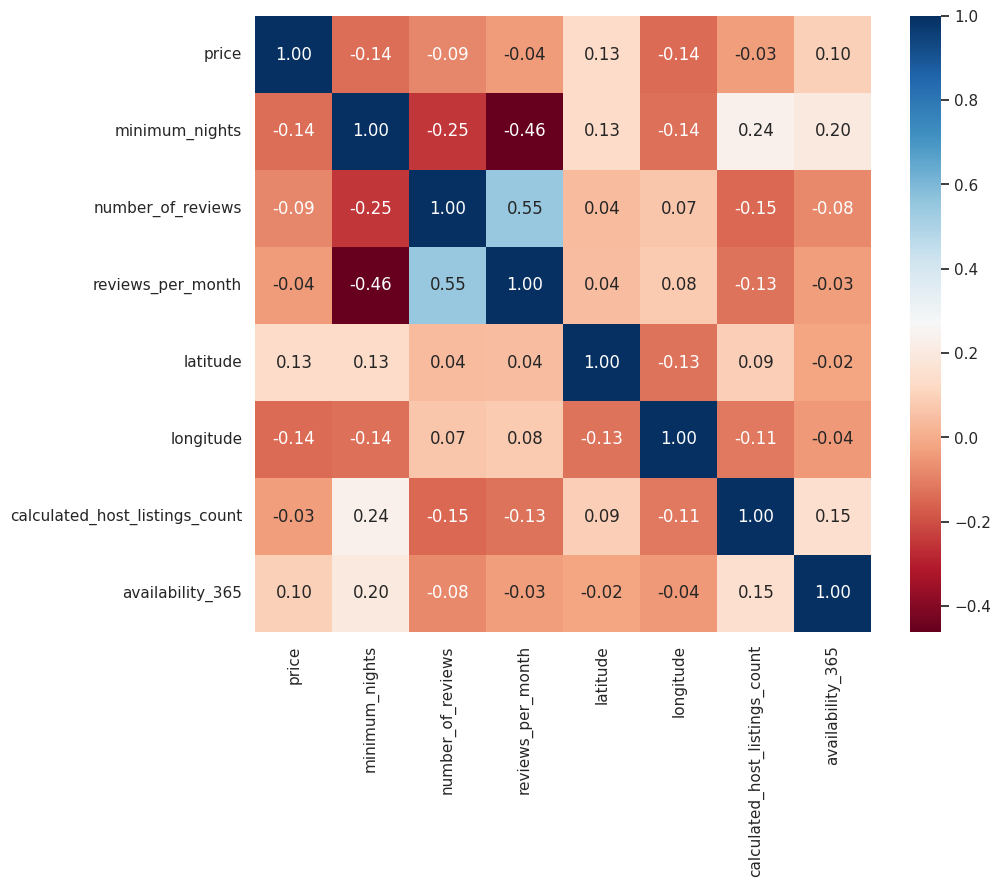

In [37]:
#corr heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [38]:
#room type available
df_clean.room_type.value_counts()

Entire home/apt    4687
Private room        994
Shared room          25
Hotel room            3
Name: room_type, dtype: int64

In [39]:
# % room type available
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    82.098441
Private room       17.411105
Shared room         0.437905
Hotel room          0.052549
Name: room_type, dtype: float64

In [ ]:
# mean top 10 price
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Arbutus Ridge        233.223684
West Point Grey      219.000000
Kitsilano            212.786517
Downtown             207.185457
Dunbar Southlands    186.872727
Fairview             183.891156
West End             181.400394
Shaughnessy          177.537500
Riley Park           177.288732
Downtown Eastside    176.735395
Name: price, dtype: float64

In [40]:
# mean bottom 10 price
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:10]

neighbourhood
Killarney                   129.379310
Marpole                     132.400000
Renfrew-Collingwood         133.366379
Hastings-Sunrise            135.586667
Victoria-Fraserview         139.833333
Sunset                      149.097345
Oakridge                    155.109756
Kerrisdale                  161.768293
Kensington-Cedar Cottage    163.636888
South Cambie                169.445946
Name: price, dtype: float64

In [45]:
print(df_clean[df_clean.neighbourhood == "Arbutus Ridge"].shape)
df_maior_mean_price=df_clean[df_clean.neighbourhood == "Arbutus Ridge"]
df_clean[df_clean.neighbourhood == "Arbutus Ridge"]

(76, 12)


,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
27,Room with a Garden View!,412802,Arbutus Ridge,49.245200,-123.165440,Entire home/apt,100,2,729,4.99,2,225
118,Stunning 1 Bedroom Laneway,7554741,Arbutus Ridge,49.239680,-123.167620,Entire home/apt,111,31,95,0.81,1,244
605,Kerrisdale Craftsman,75625891,Arbutus Ridge,49.242550,-123.151480,Entire home/apt,440,7,2,0.02,1,0
608,Room in the Tree Tops,412802,Arbutus Ridge,49.247750,-123.166920,Private room,85,1,280,3.41,2,193
738,3BDR Beautiful Home with Gorgeous Views,82402482,Arbutus Ridge,49.245660,-123.166140,Entire home/apt,150,30,25,0.34,2,138
...,...,...,...,...,...,...,...,...,...,...,...,...
5836,Brand New Suite in Peaceful Kerrisdale,227662329,Arbutus Ridge,49.242202,-123.155496,Entire home/apt,61,30,0,0.00,102,291
5837,High-End Suite in Perfect Neighbourhood,227662329,Arbutus Ridge,49.242321,-123.156957,Entire home/apt,56,30,0,0.00,102,363
5904,Industrial style fashion design-central location,219085594,Arbutus Ridge,49.240143,-123.162614,Entire home/apt,399,1,0,0.00,4,190
5928,Cozy Private Room in Vancouver,495229193,Arbutus Ridge,49.239984,-123.169658,Private room,999,30,0,0.00,1,365


In [46]:
print(df_clean[df_clean.neighbourhood == "Killarney"].shape)
df_menor_mean_price=df_clean[df_clean.neighbourhood == "Killarney"]
df_clean[df_clean.neighbourhood == "Killarney"]

(87, 12)


,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
49,Lovely large room w/ private bath,1200456,Killarney,49.228340,-123.030470,Private room,140,2,48,0.37,6,365
50,Beautiful room (s) Vancouver Home,1200456,Killarney,49.230340,-123.029710,Private room,135,2,41,0.31,6,365
171,2 bedroom house Central location (M),12487338,Killarney,49.210830,-123.042640,Entire home/apt,137,30,16,0.15,1,365
263,Luxury Private room w/ Private Bath,1200456,Killarney,49.228260,-123.031930,Private room,140,2,29,0.28,6,365
404,Japanese Style One Bedroom Suite,40246737,Killarney,49.222390,-123.032770,Entire home/apt,198,15,16,0.23,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5642,Quiet 1-bd Basement Unit in Vancouver,129592630,Killarney,49.231668,-123.036410,Entire home/apt,105,1,1,1.00,4,352
5643,Quiet 2-bd 1.5ba Unit in Vancouver,129592630,Killarney,49.231077,-123.036481,Entire home/apt,135,1,2,2.00,4,358
5793,Spacious 3B+2B Condo/Huge Balcony!,480478314,Killarney,49.206250,-123.031670,Entire home/apt,379,1,1,1.00,18,68
5795,private room for rent,418926871,Killarney,49.209564,-123.030922,Private room,34,30,0,0.00,2,346


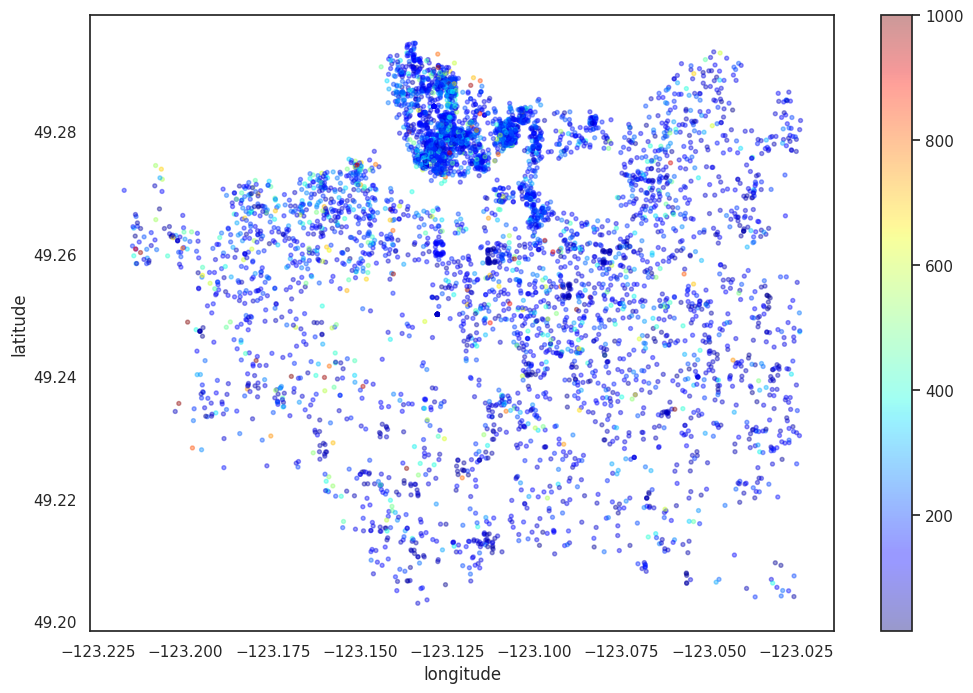

In [42]:
# latitude-longitude listings
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

In [47]:


centro_mapa = {'lat':df_maior_mean_price.latitude.mean(), 'lon':df_maior_mean_price.longitude.mean()}
mapa = px.density_mapbox(df_maior_mean_price, lat='latitude', lon='longitude',z='price', radius=5,
                        center=centro_mapa, zoom=10,
                        mapbox_style='stamen-terrain')
mapa.show()

In [48]:
centro_mapa = {'lat':df_menor_mean_price.latitude.mean(), 'lon':df_menor_mean_price.longitude.mean()}
mapa = px.density_mapbox(df_menor_mean_price, lat='latitude', lon='longitude',z='price', radius=5,
                        center=centro_mapa, zoom=10,
                        mapbox_style='stamen-terrain')
mapa.show()

In [44]:
centro_mapa = {'lat':df_clean.latitude.mean(), 'lon':df_clean.longitude.mean()}
mapa = px.density_mapbox(df_clean, lat='latitude', lon='longitude',z='price', radius=5,
                        center=centro_mapa, zoom=10,
                        mapbox_style='stamen-terrain')
mapa.show()

In [49]:
#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=df_clean.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
314,"Large, Modern & Private Space",28381470,Kensington-Cedar Cottage,49.24731,-123.08777,Entire home/apt,110,2,863,8.88,1,156
27,Room with a Garden View!,412802,Arbutus Ridge,49.24520,-123.16544,Entire home/apt,100,2,729,4.99,2,225
249,"Cosy room near scenic park, pvt BR",16794128,Riley Park,49.23570,-123.10428,Private room,80,3,721,6.95,1,114
401,Vintage Loft in Converted Warehouse,6723104,Downtown Eastside,49.28185,-123.10456,Entire home/apt,146,2,711,7.74,1,299
174,Ann's Place,13270979,South Cambie,49.25222,-123.11860,Entire home/apt,112,2,651,6.04,1,155
238,Private Garden Suite on the Drive,13871489,Grandview-Woodland,49.27198,-123.06810,Entire home/apt,130,1,643,6.10,1,53
29,Main Street Vineyard,622926,Riley Park,49.24615,-123.09462,Private room,95,3,605,4.28,1,193
250,Private Garden space on the drive.,19709041,Grandview-Woodland,49.26998,-123.06769,Entire home/apt,95,1,599,5.73,1,95
106,Stylish Hotel Room in Downtown Vancouver,6033,Downtown,49.28478,-123.11920,Private room,156,2,533,4.52,2,225
19,"🌟Private Studio in the ❤ of ""The Drive""🚶‍♂️➡️ 94",151996,Grandview-Woodland,49.27290,-123.06973,Entire home/apt,99,2,532,3.47,1,222


In [55]:
price_avrg=top_reviewed_listings.price.mean()
number_of_reviews_max=top_reviewed_listings.number_of_reviews.max()
print('Average price per night: {}'.format(price_avrg))
print('Max number of reviews: {}'.format(number_of_reviews_max))

Average price per night: 112.3
Max number of reviews: 863


**Conclusion**

This Airbnb ('vancouver_airbnb_listings') dataset for the 2023 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented.

First, we found that our top host neighbourhood 1624 listings. After that, we proceeded with analyzing neighborhood listing densities and what areas were more popular than another.

Next, we put good use of our latitude and longitude columns and used to create a geographical heatmap color-coded by the price of listings. The most listings are near the tourist area.

Lastly, we found the most reviewed listings and analyzed some additional attributes.